In [87]:
%pylab inline
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


How to go from a density distribution to an other density distribution function:

$P(x)dx -> P(y)dy$

We can do it by: 

$|P(x)dx| = |P(Y)dy|$

if $P(x)dx = 1$

$dx = P(y)dy$

solving for $x$:

$x = \int P(y)dy$

## 1. Exponential Distribution

$P(y) = \dfrac{1}{a} e^{-y/a}$

$x = -e^{-y/a}$

$y = -a ln(x)$

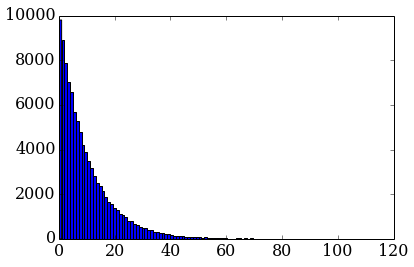

In [89]:
a = 10.0
x = random.random(100000)
f = -a*log(x)
h = hist(f, bins=100)

## 2. Gaussian Distribution.

$G(z) = 1 / \sqrt{2\pi\sigma^2} e^{(z-z_0)^2/{2\sigma^2}}$

The integral of this distribution function is the error function.

### Box Muler tranformation: 

The method uses two random dsitributions to go to two normal distributions.

$y = z-z_0/\sigma$
$z = z_0 + \sigma - y$

$y_1 = \sqrt{-2 ln x_1} cos(2\pi x_1)$

$y_2 = \sqrt{-2 ln x_1} cos(2\pi x_2)$

$|P(y_1, y_2)dy_1 dy_2| = P(x_1,x_2)dx_1dx_2$

$P(y_1, y_2) = |\dfrac{\partial{x_1x_2}}{\partial{y_1y_2}}|$

$P(x_1,x_2) = 1$

$y_1^2 + y_2^2 = - 2lnx_1 $
$x1 = exp(-1/2 ((y1^2 + y2^2)))$
$y2/y1 = tan(2\pi x_2) $
$x_2 = 1/(2\pi) tan^{-2}(y2/y1)$

$P(y1,y2) = (1/sqrt(2 \pi) e^{-y1^2/2} )(1/sqrt(2 \pi) e^{-y2^2/2} )$

In [91]:
def gaussian(N):
    x1 = random.random(N)
    x2 = random.random(N)
    #P = 1/np.sqrt(2*pi)*exp(-y1**2.0/2.0) * 1/np.sqrt(2*pi)*exp(-y1**2.0/2.0)
    y1 = sqrt(-2*log(x1)) * cos(2*pi*x2)
    y2 = sqrt(-2*log(x1)) * sin(2*pi*x2)
    return y1


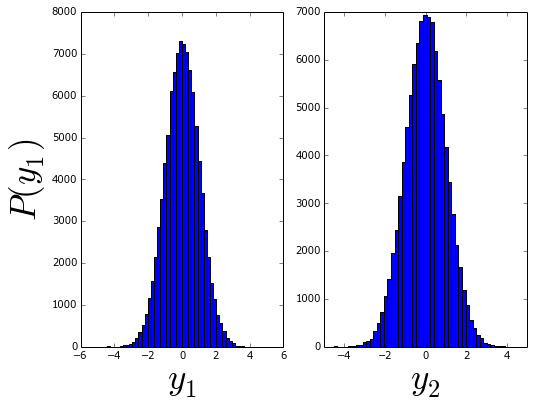

In [83]:
figure(figsize=(8, 6))
subplot(1, 2, 1)
g = hist(y1, bins=50)
xlabel('$y_1$', fontsize=35)
ylabel('$P(y_1)$', fontsize=35)
subplot(1, 2, 2)
xlabel('$y_2$', fontsize=35)
#ylabel('$P(y_2)$', fontsize=35)

g = hist(y2, bins=50)

## 3. Central limit theorem:

$x_i$ random numbers.  

$n-> x_1, ...., x_n$

$Y_n = \dfrac{1}{n} \sum_{i=1}^{n}X_i$

At high $n$ this function converges to the Gaussian distribution function.

with a very large measurements the errors are going to be gaussian, then you can use the central value as the
errors of all your measurements.

probe: http://mathworld.wolfram.com/CentralLimitTheorem.html

How easy this function converge to the Gaussian.

### Berry - Essén

$|F_n(x) - \phi_n(x)| \leq  \dfrac{C \rho}{\sigma^3 \sqrt{n}}$ 

$F_n$ distribution of $Y$, $\phi$  cumulative  distribution of gaussian, $C$ order unity, $\rho$ $3^{rd}$ moment of distribution. $\sigma^3$ dispersion of variables, $n$ number of variables. 

Any physical process always converge to a Gaussian. In extremely flat distribution the converge is very slow. 

It fails when the third moment is infinite. 

Many gaussian generators use the Central limit therem instead ofthe trnafomation of example 2, this is because is fast to sum that to take logarithms. But for the best results is better to use the Box-Muller algorithm.

## 4. Maxwell Boltzmann-Distribution

$f(v) = \left( \dfrac{m}{2 \pi k_B T} \right) 4\pi v^2 e^{-m v^2 / {2k_BT}}dv$

$v' = \sqrt{m/(k_b T)} v$
$dv' = \sqrt{m/(k_b T)} dv$

$f(v) = \dfrac{2}{\pi} v'^2 e^{-v'^2 / {2}}dv'$

$f(v_x) = \dfrac{1}{2\pi} e^{-v_x'^2 / {2}}dv'$
$f(v_y) = \dfrac{1}{2\pi} e^{-v_y'^2 / {2}}dv'$
$f(v_z) = \dfrac{1}{2\pi} e^{-v_z'^2 / {2}}dv'$
                             
$f(v_x, v_y, v_z)dxdydz = \dfrac{1}{(2\pi)^{3/2}} e^{-v^2/2}$



In [115]:
N = 100000
#vx = np.zeros(N)
vx = gaussian(N)
vy = gaussian(N)
vz = gaussian(N)

v = np.sqrt(vx**2 + vy**2 + vz**2)

MB = 1 / (2*pi)**(3.0/2.0) * exp(-v**2/2.0)

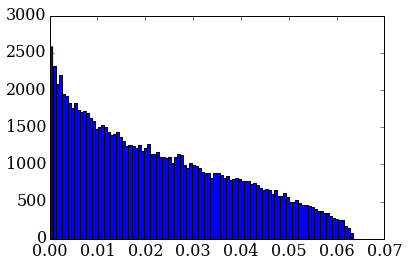

In [116]:
h4 = hist(MB, bins=100)

## 5. Rejection Method

Doesn't work for very peak distributions.


## 6. Binomial Distribution:

Suppose a positive tha can be 'yes' or 'no', the likelihood that if I observe that process is always positive.

$P$ Prios likelihood
$N$ observations
$n$ success

the chance that $n$ is correct:

$P(n, \rho) = \left( N n\right) \rho^n (1 - \rho)^{N-n} = \dfrac{N!}{n!(N-n)! \rho^{n}(1-\rho)^{N-n}}$

the mean is:

$\sum_{n=0}^N nP_b(n) = N \rho = \mu $

Variance:

$\sum_{n=0}^{N} (n-N\rho)^2 P_b(n) = N\rho(1 - \rho)$

## 7. Poisson Distribution

if $\rho<<1$ and $N\rho$ is finite the binomial distribution reduces to the Poisson distribution.

the chance of success go to 0 and the number of trials is big. The variance is equal to the mean.

$lim N-> \infty \left[ \dfrac{N!}{n!(N-n)! \rho^n (1 - \rho)^{N-n}}\right] $ 

$lim N-> \infty  \left[ \dfrac{(N - n + 1) .... (N-1)N}{n!) \left( \dfrac{\mu}{N}\right)^n \left( 1 - \dfrac{\mu}{N}\right)^N
\left( 1 - \dfrac{\mu}{N}\right)^-n \right] $ 

$\dfrac{\mu}{n!} lim N-> \infty  \left[ \dfrac{(N - n + 1) .... (N-1)N}{N^2) \right] lim N-> \infty (1 - \mu/N)^N$